In [39]:
import portfolio
import dataAck
import warnings
import numpy as np
warnings.filterwarnings("ignore")
tickerToTrade = "OEF"
allModels = portfolio.getModels(tickerToTrade)
for model in allModels:
    print(model.describe())

((22, ('XLV', 26, None, None), 5, 'OEF'), 22, 25)
((22, ('XLV', 26, None, None), 3, 'OEF'), 22, 25)
((22, ('TIP', 29, None, None), 3, 'OEF'), 22, 25)


# VIEW CORRELATION AND COVARIANCE

In [40]:
def generateAllReturns(allModels, joinedData):
    aggregateReturns = None
    for mod in allModels:
        print(mod.describe())
        algoReturn, factorReturn, predictions =  mod.makePredictions(joinedData)
        algoReturn.columns = [str(mod.describe())]
        if aggregateReturns is None:
            aggregateReturns = algoReturn
        else:
            aggregateReturns = aggregateReturns.join(algoReturn)
    return aggregateReturns

In [41]:
tickersRequired = []
tickersTraded = []
for mod in allModels:
    print(mod.describe())
    if mod.inputSeries.targetTicker not in tickersRequired:
        tickersRequired.append(mod.inputSeries.targetTicker)
    if mod.inputSeries.series.ticker not in tickersRequired:
        tickersRequired.append(mod.inputSeries.series.ticker)
    if mod.inputSeries.targetTicker not in tickersTraded:
        tickersTraded.append(mod.inputSeries.targetTicker)
    

pulledData, validTickers = dataAck.downloadTickerData(tickersRequired)

joinedData = dataAck.joinDatasets([pulledData[ticker] for ticker in pulledData])
modelReturns = generateAllReturns(allModels, joinedData[:-252])

((22, ('XLV', 26, None, None), 5, 'OEF'), 22, 25)
((22, ('XLV', 26, None, None), 3, 'OEF'), 22, 25)
((22, ('TIP', 29, None, None), 3, 'OEF'), 22, 25)
TIP
OEF
XLV
((22, ('XLV', 26, None, None), 5, 'OEF'), 22, 25)
THREAD  0 PROGRESS: 0.7142857142857143
THREAD  2 PROGRESS: 0.7142857142857143
THREAD  1 PROGRESS: 0.7142857142857143
THREAD  3 PROGRESS: 0.7142857142857143
THREAD  6 PROGRESS: 0.7142857142857143
THREAD  7 PROGRESS: 0.7142857142857143
THREAD  5 PROGRESS: 0.7142857142857143
THREAD  4 PROGRESS: 0.7142857142857143
THREAD  10 PROGRESS: 0.7142857142857143
THREAD  8 PROGRESS: 0.7142857142857143
THREAD  11 PROGRESS: 0.7142857142857143
THREAD  9 PROGRESS: 0.7142857142857143
THREAD  13 PROGRESS: 0.7142857142857143
THREAD  14 PROGRESS: 0.7142857142857143
THREAD  15 PROGRESS: 0.7142857142857143
THREAD  12 PROGRESS: 0.7142857142857143
THREAD  16 PROGRESS: 0.7142857142857143
THREAD  17 PROGRESS: 0.7142857142857143
THREAD  20 PROGRESS: 0.7142857142857143
THREAD  18 PROGRESS: 0.714285714285714

In [42]:
modelReturns

,"((22, ('XLV', 26, None, None), 5, 'OEF'), 22, 25)","((22, ('XLV', 26, None, None), 3, 'OEF'), 22, 25)","((22, ('TIP', 29, None, None), 3, 'OEF'), 22, 25)"
2006-09-06,0.000205,0.000818,NaN
2006-09-07,0.000000,0.000000,NaN
2006-09-08,-0.000025,-0.000099,NaN
2006-09-11,-0.000583,-0.004662,0.002331
2006-09-12,0.000233,0.000000,0.001867
2006-09-13,-0.000147,-0.000000,-0.001762
2006-09-14,0.000533,0.000000,0.002845
2006-09-15,0.000606,0.001615,0.003231
2006-09-18,0.000195,0.000000,0.000780
2006-09-19,0.000768,-0.002047,0.004094


In [43]:
modelReturnsWithFactor = modelReturns.join(dataAck.getDailyFactorReturn(tickerToTrade, joinedData))

In [54]:
def visualizeModels(modelReturns):
    from string import ascii_letters
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from IPython.display import display

    sns.set(style="white")


    # Compute the correlation matrix
    corr = modelReturns.corr()
    display(corr)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    
    sns.set(style="white")
    
    # Compute the covariance matrix
    cov = modelReturns.cov()
    display(cov)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(cov, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(cov, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

,"((22, ('XLV', 26, None, None), 5, 'OEF'), 22, 25)","((22, ('XLV', 26, None, None), 3, 'OEF'), 22, 25)","((22, ('TIP', 29, None, None), 3, 'OEF'), 22, 25)",Factor Return
"((22, ('XLV', 26, None, None), 5, 'OEF'), 22, 25)",1.000000,0.592949,0.101694,0.676976
"((22, ('XLV', 26, None, None), 3, 'OEF'), 22, 25)",0.592949,1.000000,0.058512,0.456402
"((22, ('TIP', 29, None, None), 3, 'OEF'), 22, 25)",0.101694,0.058512,1.000000,0.214726
Factor Return,0.676976,0.456402,0.214726,1.000000


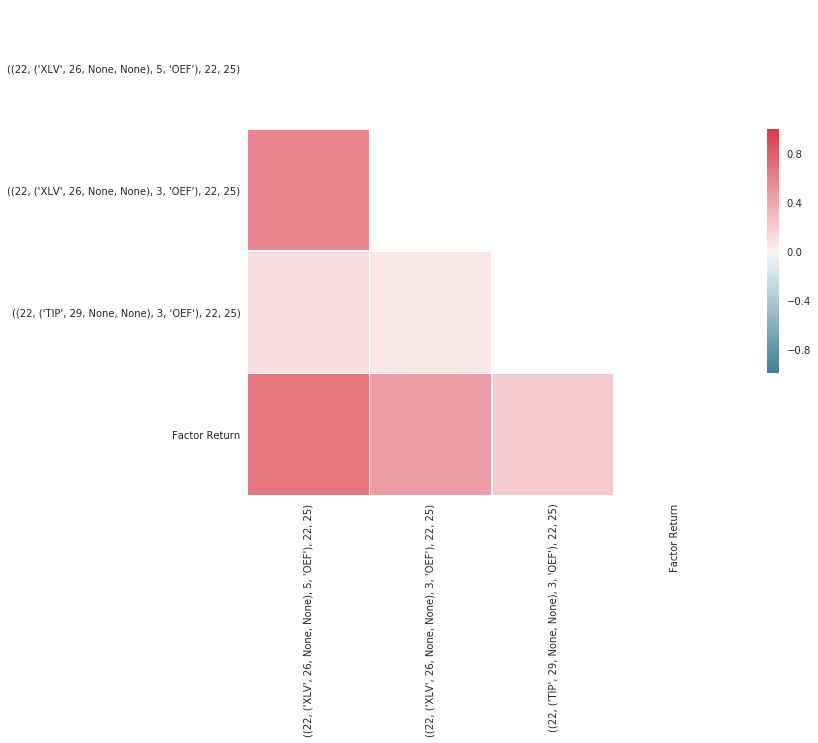

,"((22, ('XLV', 26, None, None), 5, 'OEF'), 22, 25)","((22, ('XLV', 26, None, None), 3, 'OEF'), 22, 25)","((22, ('TIP', 29, None, None), 3, 'OEF'), 22, 25)",Factor Return
"((22, ('XLV', 26, None, None), 5, 'OEF'), 22, 25)",0.000048,0.000034,0.000006,0.000059
"((22, ('XLV', 26, None, None), 3, 'OEF'), 22, 25)",0.000034,0.000070,0.000004,0.000048
"((22, ('TIP', 29, None, None), 3, 'OEF'), 22, 25)",0.000006,0.000004,0.000066,0.000022
Factor Return,0.000059,0.000048,0.000022,0.000160


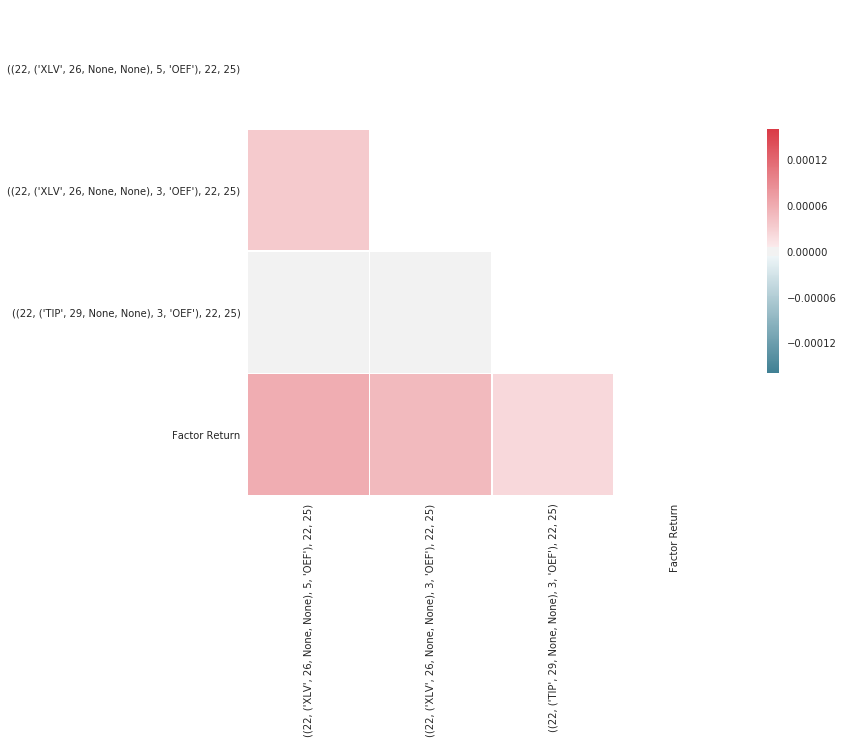

In [55]:
%matplotlib inline
visualizeModels(modelReturnsWithFactor)

# STORE MODELS AS PORTFOLIO

In [36]:
import params
from google.cloud import datastore, storage, logging
import time
import pickle
import hashlib
import sys
import numpy as np
def storePortfolio(models, description):
    allHashes = []
    for model in models:
        organismHash = hashlib.sha224(str(model.describe()).encode('utf-8')).hexdigest()
        allHashes.append(organismHash)
    
    allHashes.sort()
    portfolioHash = hashlib.sha224(str(allHashes).encode('utf-8')).hexdigest()
    print("PORTFOLIO HASH:", portfolioHash)
    for hashing in allHashes:
        print(hashing)
        
    
        ##UPLOAD ORGANISM OBJECT
        while True:
            try:
                toUpload = {
                    "portfolio":portfolioHash,
                    "model":hashing
                }
                datastoreClient = datastore.Client('money-maker-1236')
                #HASH DIGEST
                key = datastoreClient.key(params.portfolioDB, hashlib.sha224(str(hashing + portfolioHash).encode('utf-8')).hexdigest()) #NEED TO HASH TO ENSURE UNDER COUNT
                organismToStore = datastore.Entity(key=key)
                organismToStore.update(toUpload)
                datastoreClient.put(organismToStore)
                break
            except:
                print("UPLOAD ERROR:", str(sys.exc_info()))
                time.sleep(10)
    
    while True:
        try:
            toUpload = {
                "description":description
            }
            datastoreClient = datastore.Client('money-maker-1236')
            #HASH DIGEST
            key = datastoreClient.key(params.portfolioLookup, portfolioHash) #NEED TO HASH TO ENSURE UNDER COUNT
            organismToStore = datastore.Entity(key=key)
            organismToStore.update(toUpload)
            datastoreClient.put(organismToStore)
            break
        except:
            print("UPLOAD ERROR:", str(sys.exc_info()))
            time.sleep(10)

In [38]:
storePortfolio(allModels, "EWZ 08-11-19")

PORTFOLIO HASH: 514d5ee998b05536888778bb1d1d48d638992056a6ed8bdb2023cee2
30e79488fb925fedbb3f63f6abb86757c4763d92bc4e893a87556d59
419d1aadd49f8b53c9f732b304c4d41a0576d4c721a3da0c0e0c7730
584efc9e68aed8795e0138754b77cc3c760d3454153bddf090caf8f9
7ff98f4707692aaf28e9b72000b57a7934e07a7d715957e4e389bff2
bad9f9f22f779a70cccb3c9197c9f0b5229ce68f4c648aa04e04f97f
bafabbb2ddbb6e294ed821e1e1e41116981d49addb415b95798bb67e
beef2ac53b15ac017d4a6c61d83d1a8126ca82d4025fbfbd582fb8df
c26a1518a8eb9d58caca155d4bb0dfbb0a52574d37e69cd3eb48282e
e1111d514a667ab22d8f48a2734a7dab0be1350f8ce70ca3b8a172ac


In [42]:
def getPortfolios():
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=params.portfolioLookup)
            retrievedPortfolios = [{
                "key":item.key.name,
                "description":item["description"]
            } for item in list(query.fetch())]

            return retrievedPortfolios
        except:
            time.sleep(10)
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))

In [44]:
portfolios = getPortfolios()
print(portfolios)

[{'key': '514d5ee998b05536888778bb1d1d48d638992056a6ed8bdb2023cee2', 'description': 'EWZ 08-11-19'}]


In [45]:
def getPortfolioModels(portfolioKey):
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=params.portfolioDB)
            query.add_filter('portfolio', '=', portfolioKey)
            
            retrievedModels = [item["model"] for item in list(query.fetch())]

            return retrievedModels
        except:
            time.sleep(10)
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))

In [47]:
for item in portfolios:
    print(item)
    print(getPortfolioModels(item["key"]))

{'key': '514d5ee998b05536888778bb1d1d48d638992056a6ed8bdb2023cee2', 'description': 'EWZ 08-11-19'}
['bafabbb2ddbb6e294ed821e1e1e41116981d49addb415b95798bb67e', 'e1111d514a667ab22d8f48a2734a7dab0be1350f8ce70ca3b8a172ac', 'beef2ac53b15ac017d4a6c61d83d1a8126ca82d4025fbfbd582fb8df', 'bad9f9f22f779a70cccb3c9197c9f0b5229ce68f4c648aa04e04f97f', '30e79488fb925fedbb3f63f6abb86757c4763d92bc4e893a87556d59', '419d1aadd49f8b53c9f732b304c4d41a0576d4c721a3da0c0e0c7730', '584efc9e68aed8795e0138754b77cc3c760d3454153bddf090caf8f9', 'c26a1518a8eb9d58caca155d4bb0dfbb0a52574d37e69cd3eb48282e', '7ff98f4707692aaf28e9b72000b57a7934e07a7d715957e4e389bff2']


In [52]:
def getModelsByKey(modelHashes):
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            ##form keys
            keys = []
            for hashing in modelHashes:
                key = datastore_client.key(params.datastoreName, hashing)
                keys.append(key)
                
            retrievedModels = datastore_client.get_multi(keys)
            toReturn = []
            for source in retrievedModels:
                toReturn.append(pickle.loads(source["model"]))
            return toReturn
            
        except:
            time.sleep(10)
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))

In [53]:
getModelsByKey(getPortfolioModels(item["key"]))